In [35]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LinearRegression,
    Trainer
)

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [36]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 50
SIZE = 200
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce GTX 1650


In [37]:
X = torch.randn(SIZE, 2, dtype=DTYPE, device='cpu')
y = 2 * X[:, 0] + 3 * X[:, 1] + 5 + torch.randn(SIZE, dtype=DTYPE, device='cpu')

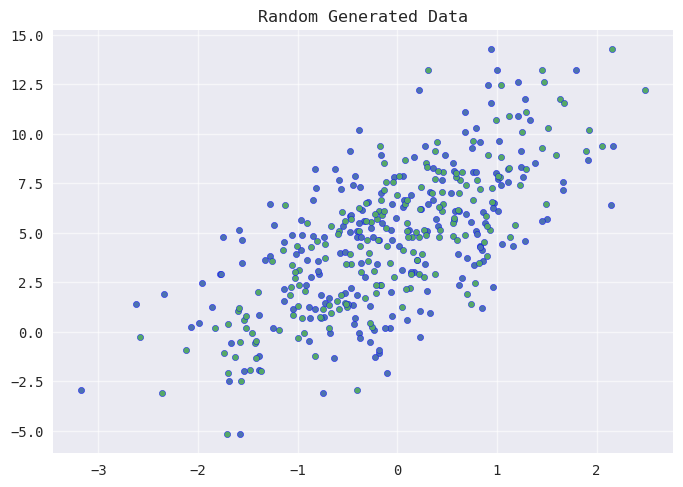

In [38]:
plt.scatter(X[:, 0].numpy(), y.numpy(), s=20, edgecolors="b");
plt.scatter(X[:, 1].numpy(), y.numpy(), s=20, edgecolors="b");
plt.grid(True, alpha = .6);
plt.title("Random Generated Data");
plt.show()

In [39]:
X, X.shape

(tensor([[ 0.9567, -1.0670],
         [-3.1714, -0.4059],
         [-0.1830, -1.7379],
         [-0.3854,  1.9197],
         [-0.7904,  0.1383],
         [-0.3808, -1.4592],
         [ 0.7590,  0.4549],
         [-0.8496,  0.7600],
         [-0.1835, -0.1927],
         [ 0.6950, -0.7228],
         [-0.0497,  0.4539],
         [ 0.1138,  0.4235],
         [-0.4242, -0.7683],
         [ 0.1344, -0.0071],
         [ 0.4805,  0.9054],
         [-0.4048,  0.0924],
         [-0.6851, -0.3270],
         [-0.4692,  0.1317],
         [-0.1694, -0.9826],
         [-1.9635,  0.7816],
         [ 0.0613,  0.0161],
         [ 0.5546,  0.2842],
         [-0.7419, -2.3669],
         [-0.4741,  0.8934],
         [-0.9213, -0.1642],
         [-1.7785,  0.2141],
         [ 0.1006, -1.5437],
         [ 0.2784, -0.4664],
         [ 0.8259, -0.3746],
         [ 0.6130, -0.4728],
         [ 0.3295, -0.6656],
         [ 0.7906,  0.6504],
         [ 1.0112, -0.1823],
         [ 1.6654, -0.1359],
         [-0.4

In [40]:
y, y.shape

(tensor([ 2.2469, -2.9342, -1.1006, 10.1735,  2.9231, -0.0846,  8.0582,  6.6572,
          4.6409,  3.7265,  6.4551,  5.1393,  0.6667,  6.9065,  8.9357,  5.1009,
          1.6881,  2.1951,  2.3340,  2.4804,  7.8780,  8.5145, -3.1177,  5.8542,
          2.3786,  2.9220,  0.5679,  3.4385,  4.3152,  3.8978,  0.9277,  8.0782,
          6.1151,  7.1371,  5.9136,  5.1167, -1.2704, 14.2807,  1.2490, 10.2765,
          2.7417,  3.3402,  8.5235,  2.8945, -0.5664,  2.0516,  3.9582,  2.7598,
          1.2263,  6.5168,  7.6733,  4.8505,  4.4305,  4.8782,  8.8069,  5.1110,
          4.5329,  7.7938,  1.1502, -1.9741,  6.4362,  5.5456, 12.5933,  2.1415,
          6.2556, -0.4665,  4.7636,  9.2782,  4.6129,  0.2543,  1.3033, -1.9549,
          9.1450,  7.5399,  7.6542,  3.8025,  6.9858,  0.1927, -2.4858,  5.6863,
          1.4127, 13.2226,  4.6493,  5.6627, -1.2142,  1.8379,  9.4026,  7.7975,
          0.8536,  3.9404, -0.0687,  3.1251,  9.3566,  3.5704,  2.3786,  8.1040,
          0.0914,  5.3112,  

In [41]:
Data = TensorDataset(X, y)
Data.tensors

(tensor([[ 0.9567, -1.0670],
         [-3.1714, -0.4059],
         [-0.1830, -1.7379],
         [-0.3854,  1.9197],
         [-0.7904,  0.1383],
         [-0.3808, -1.4592],
         [ 0.7590,  0.4549],
         [-0.8496,  0.7600],
         [-0.1835, -0.1927],
         [ 0.6950, -0.7228],
         [-0.0497,  0.4539],
         [ 0.1138,  0.4235],
         [-0.4242, -0.7683],
         [ 0.1344, -0.0071],
         [ 0.4805,  0.9054],
         [-0.4048,  0.0924],
         [-0.6851, -0.3270],
         [-0.4692,  0.1317],
         [-0.1694, -0.9826],
         [-1.9635,  0.7816],
         [ 0.0613,  0.0161],
         [ 0.5546,  0.2842],
         [-0.7419, -2.3669],
         [-0.4741,  0.8934],
         [-0.9213, -0.1642],
         [-1.7785,  0.2141],
         [ 0.1006, -1.5437],
         [ 0.2784, -0.4664],
         [ 0.8259, -0.3746],
         [ 0.6130, -0.4728],
         [ 0.3295, -0.6656],
         [ 0.7906,  0.6504],
         [ 1.0112, -0.1823],
         [ 1.6654, -0.1359],
         [-0.4

In [42]:
Model = LinearRegression(in_dims=2).to(DEVICE)

In [43]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, shuffle=True)

In [44]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.L1Loss(reduction='mean'),
    device=DEVICE
)

In [45]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

	Epoch 1 | Weights: tensor([-1.0619,  0.5645], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.7906], device='cuda:0')
	Epoch 1 | Weights: tensor([-1.0288,  0.5615], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.7094], device='cuda:0')
	Epoch 1 | Weights: tensor([-1.0361,  0.5672], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.6219], device='cuda:0')
	Epoch 1 | Weights: tensor([-1.0372,  0.5945], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.5281], device='cuda:0')
	Epoch 1 | Weights: tensor([-1.0044,  0.6302], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.4531], device='cuda:0')
Epoch 1/50 | Loss: 5.5417
	| Validation Loss: 4.8894

	Epoch 2 | Weights: tensor([-0.9922,  0.6452], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.3656], device='cuda:0')
	Epoch 2 | Weights: tensor([-0.9699,  0.6555], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.2906], device='cuda:0')
	Epoch 2 | Weights: tensor([-0.9585,  0.6669], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.2156], device='cuda:0')
	Epoch 2 | Weights

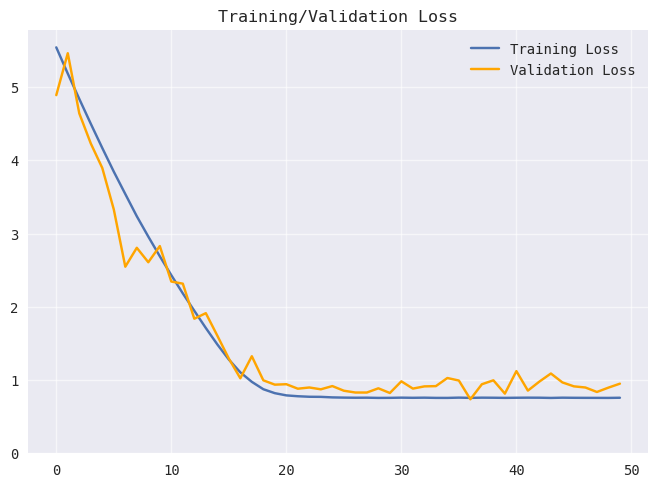

In [46]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.ylim(bottom=0)
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [47]:
# y = 2 * X[:, 0] + 3 * X[:, 1] + 5 + torch.randn(SIZE, dtype=DTYPE, device='cpu')
print(
    f"Trained Weights: {Model.w.data}",
    f"Trained Bias: {Model.b.data}",
    sep="\n"
)

Trained Weights: tensor([2.1154, 2.7568], device='cuda:0')
Trained Bias: tensor([4.9781], device='cuda:0')


In [48]:
T = np.linspace(X.min(), X.max(), SIZE, dtype=np.float32).reshape(SIZE, 1)
T = torch.tensor(np.concatenate([T, T], axis=1), device=DEVICE)

# Inference
with torch.no_grad():
    yT = Model(T)

print(f"\nGenerated T:\n{T}")
print(f"\nPredictions:\n{yT}")


Generated T:
tensor([[-3.1714, -3.1714],
        [-3.1430, -3.1430],
        [-3.1146, -3.1146],
        [-3.0861, -3.0861],
        [-3.0577, -3.0577],
        [-3.0293, -3.0293],
        [-3.0008, -3.0008],
        [-2.9724, -2.9724],
        [-2.9440, -2.9440],
        [-2.9155, -2.9155],
        [-2.8871, -2.8871],
        [-2.8587, -2.8587],
        [-2.8302, -2.8302],
        [-2.8018, -2.8018],
        [-2.7734, -2.7734],
        [-2.7449, -2.7449],
        [-2.7165, -2.7165],
        [-2.6881, -2.6881],
        [-2.6596, -2.6596],
        [-2.6312, -2.6312],
        [-2.6028, -2.6028],
        [-2.5743, -2.5743],
        [-2.5459, -2.5459],
        [-2.5175, -2.5175],
        [-2.4890, -2.4890],
        [-2.4606, -2.4606],
        [-2.4322, -2.4322],
        [-2.4037, -2.4037],
        [-2.3753, -2.3753],
        [-2.3469, -2.3469],
        [-2.3184, -2.3184],
        [-2.2900, -2.2900],
        [-2.2616, -2.2616],
        [-2.2331, -2.2331],
        [-2.2047, -2.2047],
      

In [49]:
T.shape, yT.shape

(torch.Size([200, 2]), torch.Size([200]))

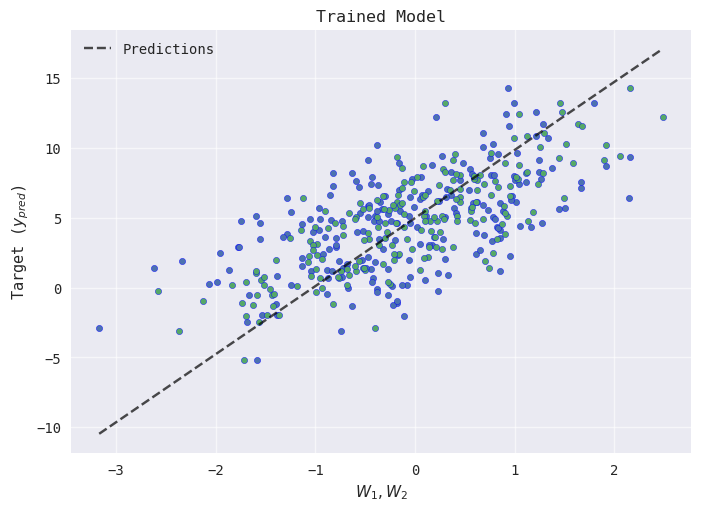

In [50]:
plt.scatter(X[:, 0].numpy(), y.numpy(), s=20, edgecolors="b");
plt.scatter(X[:, 1].numpy(), y.numpy(), s=20, edgecolors="b");
# Predicted Linear Model
plt.plot(T[:, 0].cpu().numpy(), yT.cpu().numpy(), color="black", alpha=.7, linestyle='--', label="Predictions");
plt.grid(True, alpha = .6);
plt.title("Trained Model");
plt.xlabel("$W_1, W_2$");
plt.ylabel("Target ($y_{pred}$)")
plt.legend(loc='best');
plt.show()